In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("Twitter_Data.csv")
data.isnull().sum()
data["input"]=data["clean_text"].fillna("hi")
data
data["output"]=data["category"].fillna(0.0)

In [3]:
print(len(data))
data.head()

162980


,clean_text,category,input,output
0,when modi promised “minimum government maximum...,-1.0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...,1.0


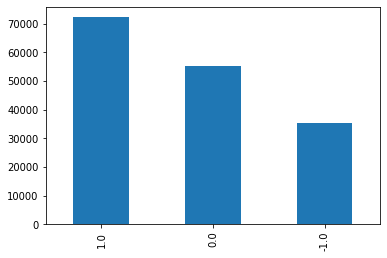

In [4]:
data['output'].value_counts().plot.bar()
plt.show()

In [5]:
X = data['input']
y = data['output']

In [6]:
X

0         when modi promised “minimum government maximum...
1         talk all the nonsense and continue all the dra...
2         what did just say vote for modi  welcome bjp t...
3         asking his supporters prefix chowkidar their n...
4         answer who among these the most powerful world...
                                ...                        
162975    why these 456 crores paid neerav modi not reco...
162976    dear rss terrorist payal gawar what about modi...
162977    did you cover her interaction forum where she ...
162978    there big project came into india modi dream p...
162979    have you ever listen about like gurukul where ...
Name: input, Length: 162980, dtype: object

In [7]:
y.value_counts()

 1.0    72251
 0.0    55219
-1.0    35510
Name: output, dtype: int64

In [8]:
X_train,X_test,ytrain,ytest=train_test_split(X,y,test_size=0.10,random_state=42)

In [9]:
X_train

132002    last decision modi giving freedom agencies and...
48439                      ’ against modi and with country 
136639    inc rule there was ease doing business inflati...
88586     what about jumla bringing back black money wit...
138872                             ெ்ீ்்ூ்் great response 
                                ...                        
119879    how tragic that you are delighted this serious...
103694     wuld like read modi interview swarajya magazine 
131932    hurt telugu pride our leader has been humiliat...
146867    fan fully support conversion cause but modi go...
121958    fifth generation family making same promise er...
Name: input, Length: 146682, dtype: object

In [10]:
X_test

45849     sir also staunch modi supporter but you should...
131657                            aloo factory productions 
65437     because they are pigs who were born raised lut...
41980      indian modi plans national broadcast wednesday\n
39625     narendra modi spearhead bjps election campaign...
                                ...                        
11910     yaha modi lakh lane wale the woh toh successfu...
122120    you support them the name party religion devel...
124234    because most them are underdogs congress pakis...
50642     actually modi wanted announce 2000 note ban no...
83318     affordable health education housing and employ...
Name: input, Length: 16298, dtype: object

In [11]:
ytrain

132002    0.0
48439     0.0
136639    1.0
88586    -1.0
138872    1.0
         ... 
119879   -1.0
103694    0.0
131932   -1.0
146867   -1.0
121958    0.0
Name: output, Length: 146682, dtype: float64

In [12]:
vectorizer = TfidfVectorizer( max_df= 0.9).fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
print(X_train.shape)

(146682, 99965)


In [13]:
encoder = LabelEncoder().fit(ytrain)
y_train = encoder.transform(ytrain)
y_test = encoder.transform(ytest)

In [14]:
model = LogisticRegression(C=.1, class_weight='balanced')
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Training Accuracy : ", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy  : ", accuracy_score(y_test, y_pred_test))

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training Accuracy :  0.8514746185626049
Testing Accuracy  :  0.8394895079150816


In [ ]:
from

In [15]:
def predict_(x, plot=False):
    tfidf = vectorizer.transform([x])
    preds = model.predict_proba(tfidf)[0]
    plt.figure(figsize=(6,4))
    sns.barplot(x= encoder.classes_, y=preds)
    plt.show()
    return preds

In [22]:
text="i love football"

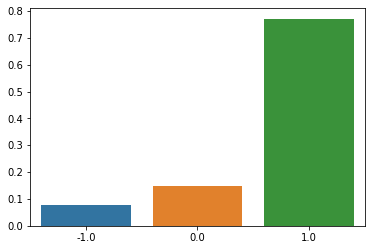

array([0.07825512, 0.15002179, 0.77172309])

In [23]:
predict_(text, plot=True)


In [68]:
x="hi all"
tfidf = vectorizer.transform([x])
preds = model.predict_proba(tfidf)[0]

In [71]:
a=preds[0]
b=preds[1]
c=preds[2]

if(a>b and a>c):
    print("negative")
elif(b>c):
    print("netural")
else:
    print("Positive")

netural
